In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder
from sklearn.svm import NuSVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

Training Dataset

In [2]:
training_data =pd.read_csv("C:/Users/Aniket Arya/Documents/Machine Learning Projects/Machine Learning/Titanic/titanic/train.csv")


In [3]:
training_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
label =LabelEncoder()
training_data['Sex']= label.fit_transform(training_data['Sex'])

In [5]:
training_data.shape

(891, 12)

In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [7]:
import matplotlib.pyplot as plt

In [8]:
training_data.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  714.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.699118   
std     257.353842    0.486592    0.836071    0.477990   14.526497   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   20.125000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   38.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000    6.000000  512.329200

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

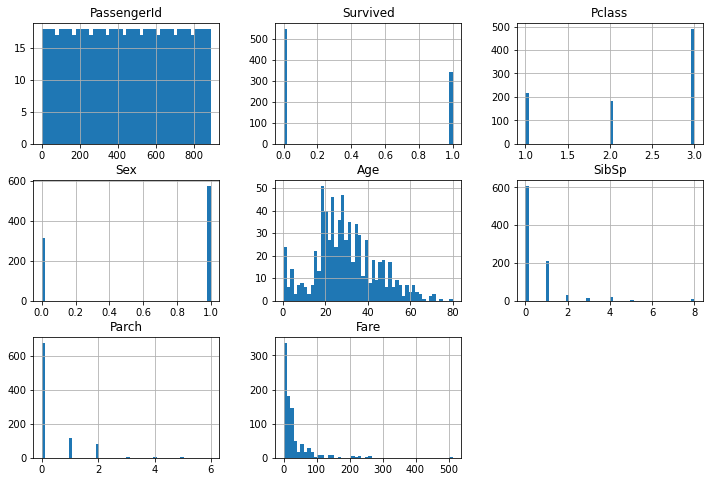

In [9]:

training_data.hist(bins=50,figsize=(12,8))

In [10]:
training_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [11]:
training_data =training_data[[ 'Pclass', 'Sex' , 'Age', 'SibSp', 'Parch', 'Fare','Survived']] 

In [12]:
median = training_data['Age'].median()
training_data['Age']=training_data['Age'].fillna(median)

In [13]:
training_data= training_data.dropna()

In [14]:
comat = training_data.corr()
comat['Survived'].sort_values(ascending=True)

Sex        -0.543351
Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

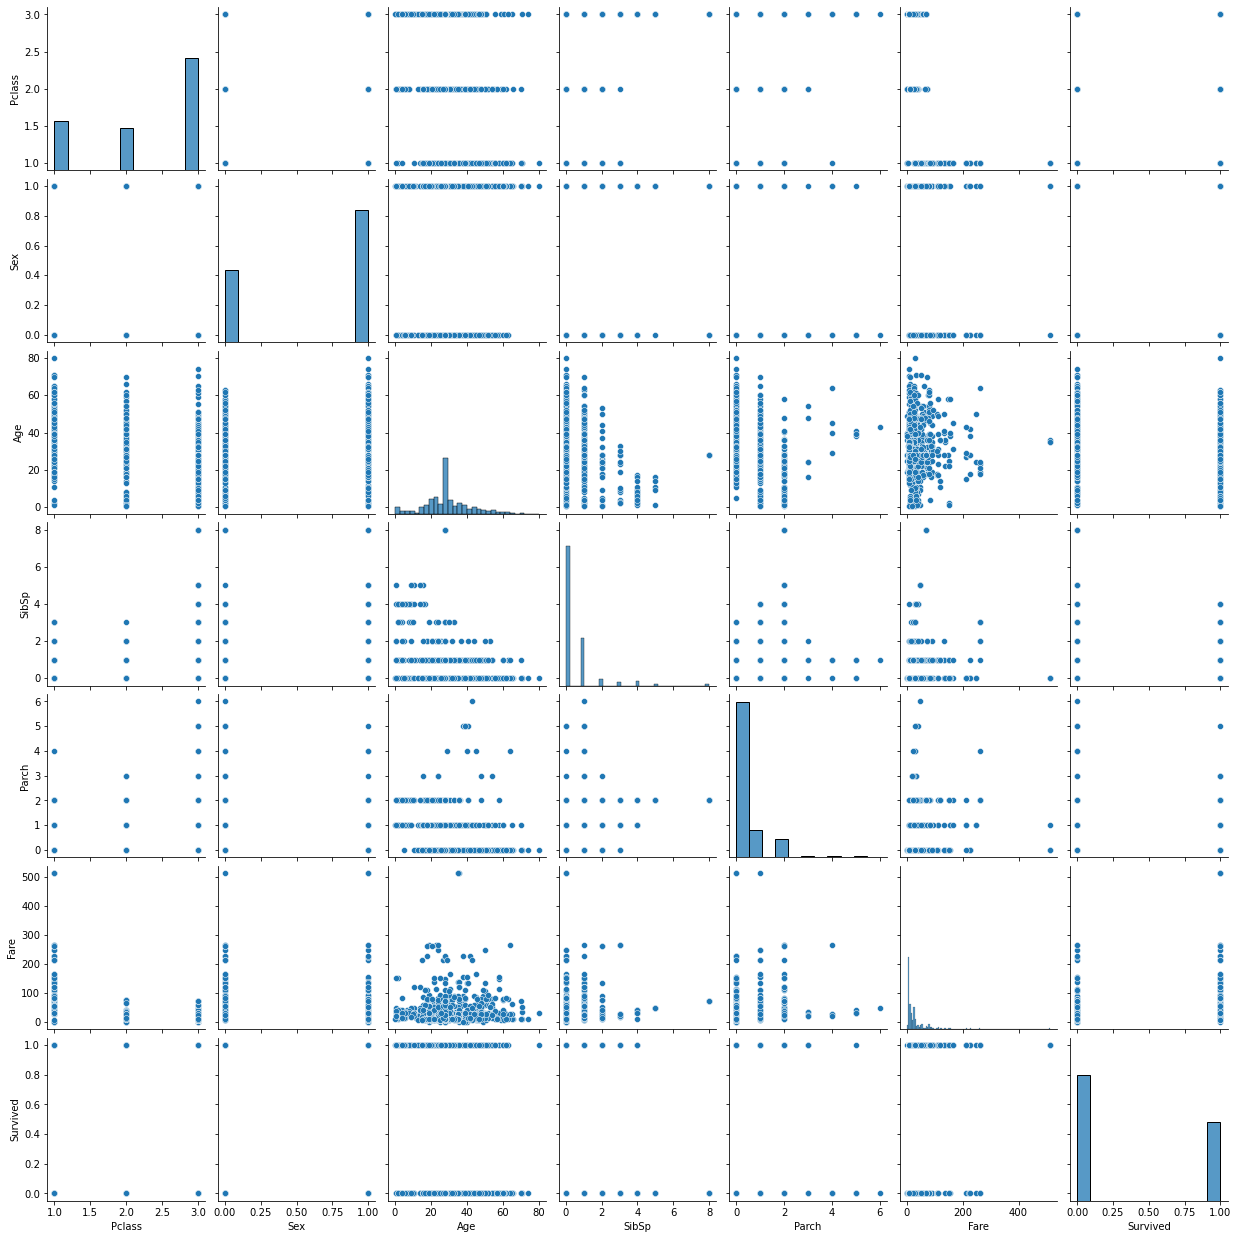

In [15]:
sns.pairplot(training_data)

Testing Dataset

In [16]:
test1 =pd.read_csv("C:/Users/Aniket Arya/Documents/Machine Learning Projects/Machine Learning/Titanic/titanic/test.csv")
test2=pd.read_csv("C:/Users/Aniket Arya/Documents/Machine Learning Projects/Machine Learning/Titanic/titanic/gender_submission.csv")
testing_data = pd.merge(test1,test2,on='PassengerId')
testing_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1

In [17]:
testing_data =testing_data[[ 'Pclass', 'Sex' , 'Age', 'SibSp', 'Parch', 'Fare','Survived']]  #

In [18]:
median = testing_data['Age'].median()
testing_data['Age']=testing_data['Age'].fillna(median)

In [19]:
testing_data['Sex']=label.fit_transform(testing_data['Sex'])

In [20]:
testing_data = testing_data.dropna()

In [21]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    int32  
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Survived  417 non-null    int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 24.4 KB


Spliting data

In [22]:
X_train = training_data.iloc[:,:-1]
y_train = training_data.iloc[:,-1]
X_test = testing_data.iloc[:,:-1]
y_test = testing_data.iloc[:,-1]

In [23]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((891, 6), (891,), (417, 6), (417,))

model 

In [24]:
model = NuSVC()
model.fit(X_train,y_train)

NuSVC()

In [25]:
Y_pred = model.predict(X_test)

In [26]:
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [27]:
accuracy_score(y_test,Y_pred)

0.947242206235012

In [28]:
mean_squared_error(y_test,Y_pred)

0.05275779376498801

In [29]:
r2_score(y_test,Y_pred)

0.7722442899702087

The Accuracy is 94 %